In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [9]:
arquivo_csv = 'data\\data_1.csv'

df = pd.read_csv(arquivo_csv)

print(df.head())
print("\n")

df.info()

          X1        X2        X3         X4
0   1.296150  0.616459  0.536597  10.404695
1   0.284791 -0.309378 -0.028529   9.675270
2   9.044055 -0.345982 -0.463596   0.481481
3  10.578521  0.349654 -0.764144  -1.437791
4  -1.945703  9.087217  0.219510   0.393063


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   X3      400 non-null    float64
 3   X4      400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


In [10]:
# objeto "scaler" - padronizador
scaler = StandardScaler()

data_scaled = scaler.fit_transform(df)

print(data_scaled[:5])

[[-0.26399421 -0.41677479 -0.42908225  1.76761695]
 [-0.49042668 -0.62878018 -0.55365082  1.60361666]
 [ 1.47067848 -0.63716209 -0.6495511  -0.46346701]
 [ 1.81422904 -0.47786986 -0.71579981 -0.89498638]
 [-0.98981024  1.5229256  -0.4989766  -0.48334657]]


In [15]:
# Determinando o Número Ideal de Clusters (k)
sse = []
silhouette_scores = []

# intervalo de 'k' para testar
k_range = range(2, 11)

# Loop para testar cada valor de 'k'
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # Treinar o modelo com os dados padronizados
    kmeans.fit(data_scaled)
    
    # --- Métrica 1: SSE (Para o Método do Cotovelo) ---
    # O '.inertia_' é como o scikit-learn chama o SSE
    sse.append(kmeans.inertia_)
    
    # --- Métrica 2: Coeficiente de Silhouette ---
    # Precisamos dos rótulos (labels) que o K-Means atribuiu
    labels = kmeans.labels_
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

print("Busca finalizada.")
print(f"Valores de k testados: {list(k_range)}")
print(f"Valores de SSE (Inertia): {sse}")
print(f"Valores de Silhouette: {silhouette_scores}")

Busca finalizada.
Valores de k testados: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Valores de SSE (Inertia): [1079.0206481507073, 576.3072053712847, 76.31832180760401, 72.04269349159382, 68.11030811315237, 64.70718918020027, 61.19096153910723, 58.43625755226583, 55.38963101118463]
Valores de Silhouette: [0.4117838371806989, 0.6053884502750703, 0.8104513571705505, 0.6564300460284912, 0.5012767912856326, 0.3428870193795656, 0.18483171607746324, 0.18544118050906155, 0.19121979572706038]


Gráfico 'elbow_plot.png' salvo.
Gráfico 'silhouette_plot.png' salvo.


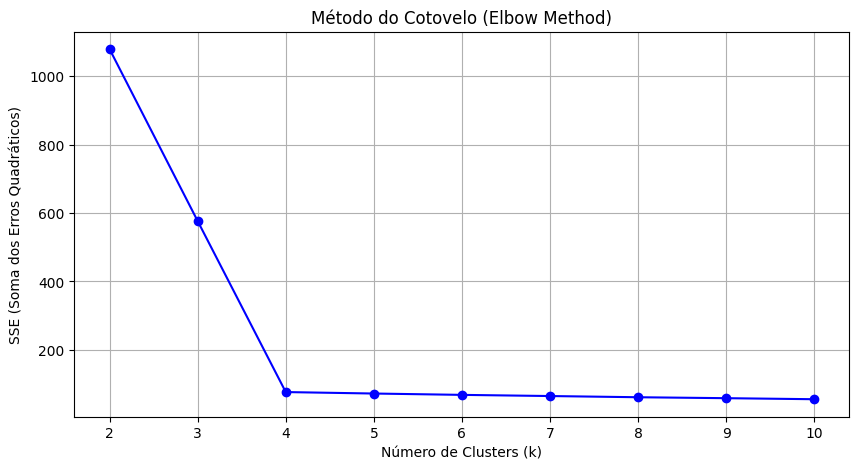

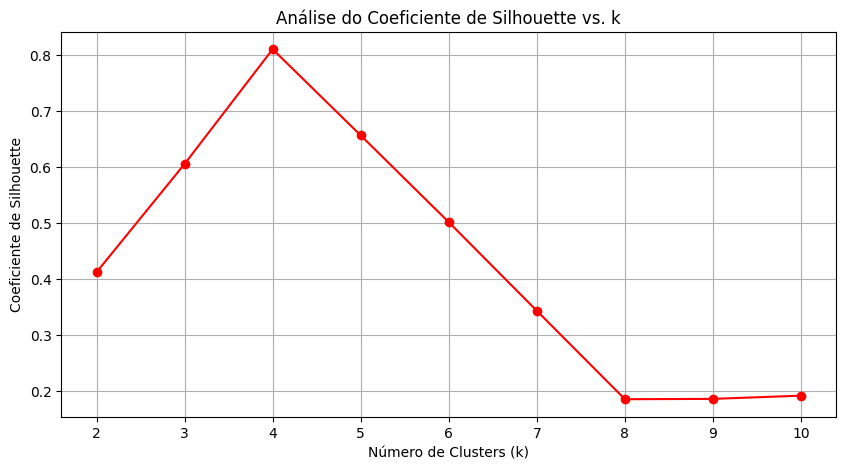

In [12]:
# Gráfico 1: Método do Cotovelo (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, 'bo-') # 'bo-' = linha azul com pontos
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE (Soma dos Erros Quadráticos)')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xticks(k_range) # Garante que todos os 'k' apareçam no eixo
plt.grid(True)
plt.savefig('elbow_plot.png') # Salva o gráfico como imagem
print("Gráfico 'elbow_plot.png' salvo.")

# Gráfico 2: Coeficiente de Silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, 'ro-') # 'ro-' = linha vermelha com pontos
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Análise do Coeficiente de Silhouette vs. k')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('silhouette_plot.png') # Salva o gráfico como imagem
print("Gráfico 'silhouette_plot.png' salvo.")

In [16]:
k_otimo = 4

print(f"--- Análise K-Means com k = {k_otimo} ---")

# Cria e Treina o modelo K-Means final
kmeans_final = KMeans(n_clusters=k_otimo, n_init=10, random_state=42)
kmeans_final.fit(data_scaled)
kmeans_labels = kmeans_final.labels_

# Quantos pontos há em cada cluster? np.bincount() conta quantas vezes cada número (rótulo) aparece
kmeans_cluster_counts = np.bincount(kmeans_labels)
print(f"\n[PERGUNTA 2] Pontos por cluster (K-Means): {kmeans_cluster_counts}")

# Qual foi o coeficiente de Silhouette? Quanto mais perto de 1, melhor.
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"\n[PERGUNTA 3] Coeficiente de Silhouette (K-Means): {kmeans_silhouette:.4f}")

# Qual foi o coeficiente de Davies-Bouldin? Quanto mais perto de 0, melhor.
kmeans_db_score = davies_bouldin_score(data_scaled, kmeans_labels)
print(f"\n[PERGUNTA 4] Índice Davies-Bouldin (K-Means): {kmeans_db_score:.4f}")

--- Análise K-Means com k = 4 ---

[PERGUNTA 2] Pontos por cluster (K-Means): [100 100 100 100]

[PERGUNTA 3] Coeficiente de Silhouette (K-Means): 0.8105

[PERGUNTA 4] Índice Davies-Bouldin (K-Means): 0.2607


In [17]:
k_otimo = 4 

print(f"--- Análise Agglomerative com k = {k_otimo} ---")

# Cria e Treina o modelo Agglomerative final
agglo_final = AgglomerativeClustering(n_clusters=k_otimo)

agglo_labels = agglo_final.fit_predict(data_scaled)

# Quantos pontos há em cada cluster?
agglo_cluster_counts = np.bincount(agglo_labels)
print(f"\n[PERGUNTA 2] Pontos por cluster (Agglomerative): {agglo_cluster_counts}")

# Qual foi o coeficiente de Silhouette?
agglo_silhouette = silhouette_score(data_scaled, agglo_labels)
print(f"\n[PERGUNTA 3] Coeficiente de Silhouette (Agglomerative): {agglo_silhouette:.4f}")

# Qual foi o coeficiente de Davies-Bouldin? 
agglo_db_score = davies_bouldin_score(data_scaled, agglo_labels)
print(f"\n[PERGUNTA 4] Índice Davies-Bouldin (Agglomerative): {agglo_db_score:.4f}")

--- Análise Agglomerative com k = 4 ---

[PERGUNTA 2] Pontos por cluster (Agglomerative): [100 100 100 100]

[PERGUNTA 3] Coeficiente de Silhouette (Agglomerative): 0.8105

[PERGUNTA 4] Índice Davies-Bouldin (Agglomerative): 0.2607


# ETAPA 5: Análise Comparativa e Conclusão

Nesta etapa final, comparamos os resultados dos dois algoritmos de clusterização (K-Means e Agglomerative) para o `k_otimo` que encontramos (**k = 4**).

## Comparação de Métricas (Perguntas 2, 3 e 4)

| Métrica | K-Means (Etapa 3) | Agglomerative (Etapa 4) | Melhor Resultado |
| :--- | :--- | :--- | :--- |
| **Pontos/Cluster (Q2)** | `[100 100 100 100]` | `[100 100 100 100]` | (Idênticos) |
| **Silhouette (Q3)** | `0.8105` | `0.8105` | (Idênticos) |
| **Davies-Bouldin (Q4)** | `0.2607` | `0.2607` | (Idênticos) |

## Conclusão (Pergunta 5)

**Pergunta:** *Há diferença na performance dessas métricas se utilizar o KMeans ou o AgglomerativeClustering?*

**Resposta:**
Não, para este conjunto de dados específico, não houve diferença perceptível. Ambos os algoritmos produziram resultados **idênticos** em todas as métricas de validação.

O Coeficiente de Silhouette (aprox. **0.8105**) e o Índice de Davies-Bouldin (aprox. **0.2607**) foram os mesmos, e a distribuição de pontos por cluster também foi idêntica (`[100 100 100 100]`).

Isso sugere que a estrutura dos dados é muito clara e que ambos os métodos (baseado em centróide e hierárquico) convergiram para a mesma solução ótima.